<a href="https://colab.research.google.com/github/cqygfxgfst-hlhg/Thesis/blob/master/522_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
# import data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ColabNotebooks/loan_campaign.csv'
loan_df = pd.read_csv(file_path,sep=';')
loan_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# deal with date
loan_df['year'] = 2022
month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

loan_df['month'] = loan_df['month'].str.lower().map(month_mapping)
loan_df['last_contact_date'] = pd.to_datetime(loan_df[['year', 'month', 'day']], format='%Y-%m-%d')

loan_df = loan_df.drop(columns=['day', 'month', 'year'])
loan_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,last_contact_date
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,2022-10-19
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,2022-05-11
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,2022-04-16
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,2022-06-03
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,2022-05-05


In [ ]:
# find the missing value and complete them
# but there is no missing value
missing_value = loan_df.isnull().sum()
# print(missing_value)

In [ ]:
# remove outliner value
# def detect_and_replace_outliers(df, column, threshold=3):
#     mean_val = df[column].mean()
#     std_val = df[column].std()

#     thresholds = {
#         'lower': mean_val - threshold * std_val,
#         'upper': mean_val + threshold * std_val
#     }

#     is_outlier = df[column].apply(lambda x: x < thresholds['lower'] or x > thresholds['upper'])
#     outliers = df[is_outlier]

#     df[column] = df[column].apply(
#         lambda x: thresholds['lower'] if x < thresholds['lower'] else thresholds['upper'] if x > thresholds['upper'] else x
#     )

#     return outliers, df

# outliers_df, loan_df = detect_and_replace_outliers(loan_df, 'balance')

# print("Outliers:")
# print(outliers_df.head(10))

# print("\nAfter Dealing:")
# print(loan_df.loc[outliers_df.index].head(10))

In [ ]:
# encode the binary_columns
binary_columns = ['default','housing','loan','y']
binary_mapping = {'no':True, 'yes':False}

loan_df_encoded = loan_df.copy()
loan_df_encoded[binary_columns] = loan_df_encoded[binary_columns].map(lambda x: binary_mapping.get(x, x))

print("\nDataframe with Binary Columns Converted to Numeric:")
print(loan_df_encoded.head())


Dataframe with Binary Columns Converted to Numeric:
   age          job  marital  education  default  balance  housing   loan  \
0   30   unemployed  married    primary     True     1787     True   True   
1   33     services  married  secondary     True     4789    False  False   
2   35   management   single   tertiary     True     1350    False   True   
3   30   management  married   tertiary     True     1476    False  False   
4   59  blue-collar  married  secondary     True        0    False   True   

    contact  duration  campaign  pdays  previous poutcome     y  \
0  cellular        79         1     -1         0  unknown  True   
1  cellular       220         1    339         4  failure  True   
2  cellular       185         1    330         1  failure  True   
3   unknown       199         4     -1         0  unknown  True   
4   unknown       226         1     -1         0  unknown  True   

  last_contact_date  
0        2022-10-19  
1        2022-05-11  
2        2022-0

In [ ]:
# encode the one_hot_columns
categorical_columns = ['job', 'marital', 'poutcome', 'contact']
loan_df_encoded = pd.get_dummies(loan_df_encoded, columns=['job', 'marital', 'poutcome', 'contact'], prefix=['job', 'marital', 'poutcome', 'contact'], drop_first=True)

print("\nOne-Hot Encoded :\n")
print(loan_df_encoded.head())


One-Hot Encoded :

   age  education  default  balance  housing   loan  duration  campaign  \
0   30    primary     True     1787     True   True        79         1   
1   33  secondary     True     4789    False  False       220         1   
2   35   tertiary     True     1350    False   True       185         1   
3   30   tertiary     True     1476    False  False       199         4   
4   59  secondary     True        0    False   True       226         1   

   pdays  previous  ...  job_technician job_unemployed  job_unknown  \
0     -1         0  ...           False           True        False   
1    339         4  ...           False          False        False   
2    330         1  ...           False          False        False   
3     -1         0  ...           False          False        False   
4     -1         0  ...           False          False        False   

   marital_married  marital_single  poutcome_other  poutcome_success  \
0             True           F

In [ ]:
from sklearn.preprocessing import LabelEncoder

education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 2} #set the unknown as mode
loan_df_encoded['education'] = loan_df_encoded['education'].map(lambda x: education_mapping.get(x, x))

print(loan_df_encoded[['education','y']].head())


   education     y
0          1  True
1          2  True
2          3  True
3          3  True
4          2  True


In [ ]:
# print(loan_df_encoded.iloc[0])
print(loan_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                4521 non-null   int64         
 1   education          4521 non-null   int64         
 2   default            4521 non-null   bool          
 3   balance            4521 non-null   int64         
 4   housing            4521 non-null   bool          
 5   loan               4521 non-null   bool          
 6   duration           4521 non-null   int64         
 7   campaign           4521 non-null   int64         
 8   pdays              4521 non-null   int64         
 9   previous           4521 non-null   int64         
 10  y                  4521 non-null   bool          
 11  last_contact_date  4521 non-null   datetime64[ns]
 12  job_blue-collar    4521 non-null   bool          
 13  job_entrepreneur   4521 non-null   bool          
 14  job_hous

In [ ]:
from sklearn.model_selection import train_test_split

X = loan_df_encoded.drop(columns=['y'])
y = loan_df_encoded['y']

train_df, test_df, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (3616, 29)
Testing set shape: (905, 29)


In [ ]:

# selected_features = [
#     'age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
#     'default', 'housing', 'loan', 'contact_telephone','poutcome_success',
#     'education', 'job_blue-collar', 'job_entrepreneur',
#     'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services',
#     'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single','last_contact_date'
# ]
# x = loan_df_encoded[selected_features]
loan_df_encoded['last_contact_date'] = loan_df_encoded['last_contact_date'].astype('int64')
x = loan_df_encoded.drop(columns=['y'])
y = loan_df_encoded['y']



In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
import time
#functions for drawing evaluation
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    # print("plot confusion")
    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 绘制混淆矩阵
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # 显示类别标签
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # 添加标签和标题
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # 显示图形
    plt.show()


def plot_roc_curve(y_true, y_pred_prob, title='Receiver Operating Characteristic (ROC)', figsize=(6, 5)):
    """
    绘制ROC曲线和计算AUC值
    参数：
    - y_true: 实际标签
    - y_pred_prob: 预测概率（通常是预测为正类的概率）
    - title: 图表标题
    - figsize: 图形大小
    """
    # 计算ROC曲线
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_pred_prob, title='Precision-Recall Curve', figsize=(6, 5)):
    """
    绘制Precision-Recall曲线
    参数：
    - y_true: 实际标签
    - y_pred_prob: 预测概率（通常是预测为正类的概率）
    - title: 图表标题
    - figsize: 图形大小
    """
    # 计算Precision和Recall
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

    # 绘制PR曲线
    plt.figure(figsize=figsize)
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#balance the number of different type
undersampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)
x_test_resampled, y_test_resampled = undersampler.fit_resample(x_test, y_test)
# print(x_train.iloc[0])
# counts = y_train_resampled.value_counts()
# print(counts)

scaler = StandardScaler()
x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test_resampled = scaler.fit_transform(x_test_resampled)
x_test = scaler.fit_transform(x_test)

# print(x_train_resampled[0])

# PCA
# pca = PCA(n_components=7)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)



Accuracy: 0.8010204081632653
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.77      0.79        98
        True       0.78      0.84      0.81        98

    accuracy                           0.80       196
   macro avg       0.80      0.80      0.80       196
weighted avg       0.80      0.80      0.80       196



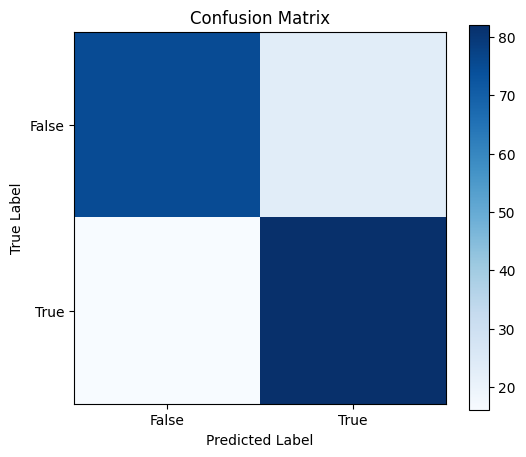

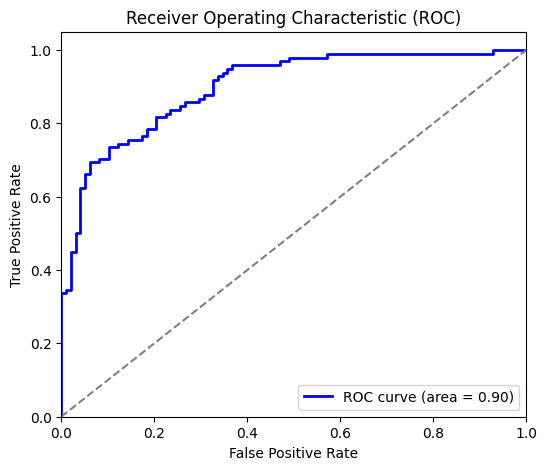

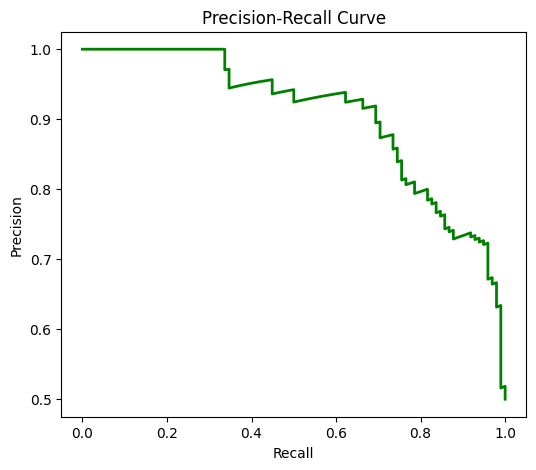

Training Time: 1.94 seconds
Cross-Validation Scores: [0.77647059 0.79289941 0.78698225 0.78698225 0.79289941]
Average Cross-Validation Score: 0.79


In [ ]:
logistic_model = LogisticRegression(class_weight='balanced')
# logistic_model = LogisticRegression()
logistic_model.fit(x_train_resampled, y_train_resampled)
y_pred = logistic_model.predict(x_test_resampled)

start_time = time.time()
print("Accuracy:", accuracy_score(y_test_resampled, y_pred))
print("Classification Report:\n", classification_report(y_test_resampled, y_pred))


plot_confusion_matrix(y_test_resampled, y_pred, classes=['False', 'True'])

plot_roc_curve(y_test_resampled, logistic_model.predict_proba(x_test_resampled)[:, 1])

plot_precision_recall_curve(y_test_resampled, logistic_model.predict_proba(x_test_resampled)[:, 1])

# 输出训练时间
end_time = time.time()
print("Training Time: {:.2f} seconds".format(end_time - start_time))

# 进行交叉验证
cv_scores = cross_val_score(logistic_model, x_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score: {:.2f}".format(cv_scores.mean()))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training the RandomForest model...


Training Progress: 100%|██████████| 100/100 [00:30<00:00,  3.27it/s]


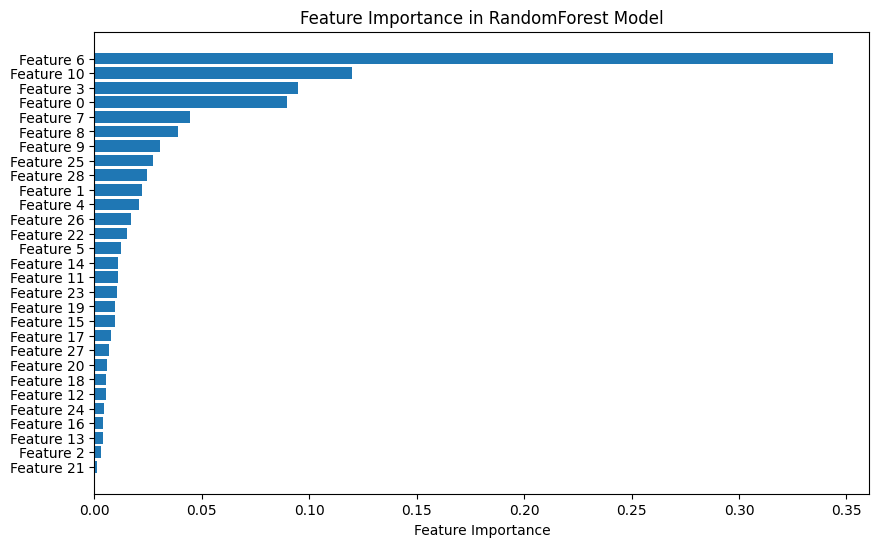

Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.82      0.80        98
        True       0.81      0.78      0.79        98

    accuracy                           0.80       196
   macro avg       0.80      0.80      0.80       196
weighted avg       0.80      0.80      0.80       196



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
# 获取最优参数并训练
best_rf = grid_search.best_estimator_

# 使用进度条进行训练（在这里模拟进度条）
tqdm.write("Training the RandomForest model...")
for _ in tqdm(range(100), desc="Training Progress"):
    rf_classifier.fit(x_train_resampled, y_train_resampled)  # 模拟训练过程

# 训练后的预测
y_pred_resampled = best_rf.predict(x_test_resampled)

# 显示特征的重要性
feature_importances = best_rf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [f"Feature {i}" for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest Model')
plt.show()
rf_classifier.fit(x_train_resampled, y_train_resampled)


y_pred = rf_classifier.predict(x_test_resampled)


print("Accuracy:", accuracy_score(y_test_resampled, y_pred))
print("Classification Report:\n", classification_report(y_test_resampled, y_pred))

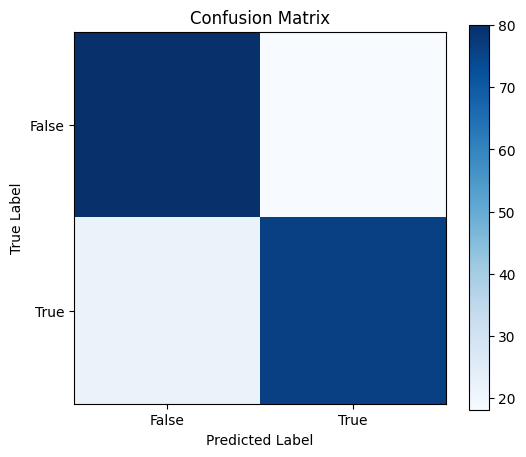

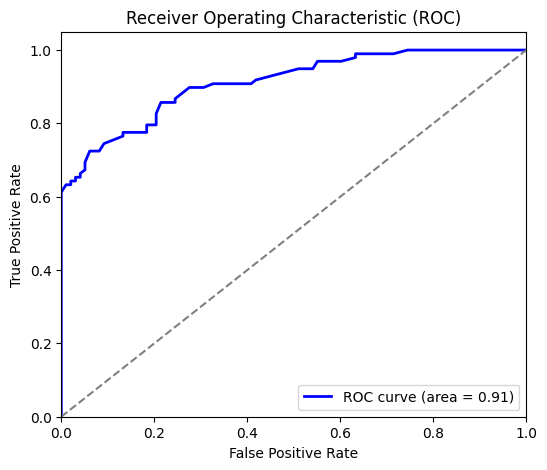

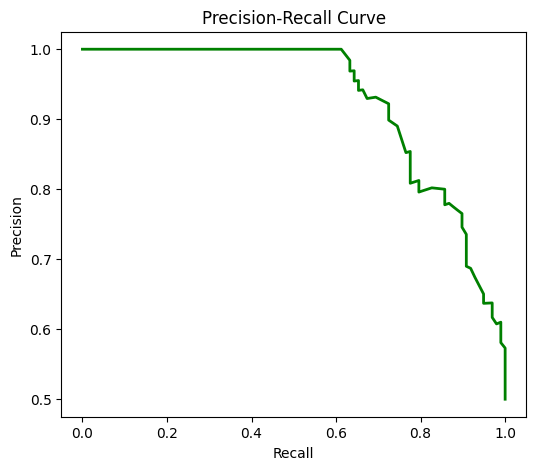

Training Time: 1433.05 seconds
Cross-Validation Scores: [0.81176471 0.81065089 0.78698225 0.83431953 0.86390533]
Average Cross-Validation Score: 0.82


In [ ]:
plot_confusion_matrix(y_test_resampled, y_pred, classes=['False', 'True'])

plot_roc_curve(y_test_resampled, best_rf.predict_proba(x_test_resampled)[:, 1])

plot_precision_recall_curve(y_test_resampled, best_rf.predict_proba(x_test_resampled)[:, 1])

# 进行交叉验证
cv_scores = cross_val_score(best_rf, x_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score: {:.2f}".format(cv_scores.mean()))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


gbt_classifier.fit(x_train, y_train)

y_pred = gbt_classifier.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8950276243093923
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.53      0.30      0.38        98

    accuracy                           0.90       905
   macro avg       0.72      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8994475138121547
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       807
           1       0.60      0.21      0.32        98

    accuracy                           0.90       905
   macro avg       0.76      0.60      0.63       905
weighted avg       0.88      0.90      0.88       905

